In [103]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [ ]:
#1. Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# 2. Read file MSN
df = pd.read_csv('SAB.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df1=df.reset_index()['Price']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1># 4. Split the data into training, testing, and validation arcording to 7:2:1

In [ ]:

train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 13s 420ms/step - loss: 0.0710 - val_loss: 0.0050
Epoch 2/100
13/13 [==============================] - 2s 194ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 3/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 4/100
13/13 [==============================] - 3s 231ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 3s 256ms/step - loss: 0.0033 - val_loss: 4.1829e-04
Epoch 6/100
13/13 [==============================] - 2s 180ms/step - loss: 0.0033 - val_loss: 5.7125e-04
Epoch 7/100
13/13 [==============================] - 2s 184ms/step - loss: 0.0031 - val_loss: 6.7812e-04
Epoch 8/100
13/13 [==============================] - 2s 185ms/step - loss: 0.0031 - val_loss: 8.0502e-04
Epoch 9/100
13/13 [==============================] - 3s 208ms/step - loss: 0.0030 - val_loss: 7.8096e-04
Epoch 10/100
13/13 [==============================] - 4s 282ms/step - 

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 55ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 1812.864244327128
Testing RMSE: 2233.3258316214333
Validate MAE:  1364.9735383064515
Test MAE:  1680.4968171296296
Validate MAPE:  2.3832571570649628
Test MAPE:  2.3139761888561856


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[32:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.0288416]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865 

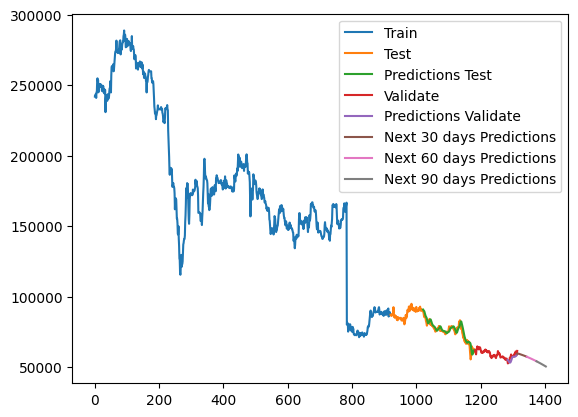

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()

<h1># 4. Split the data into training, testing, and validation arcording to 5:3:2

In [ ]:
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 10s 517ms/step - loss: 0.1110 - val_loss: 0.0235
Epoch 2/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0144 - val_loss: 0.0103
Epoch 3/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0085 - val_loss: 0.0214
Epoch 4/100
9/9 [==============================] - 2s 204ms/step - loss: 0.0056 - val_loss: 0.0106
Epoch 5/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0042 - val_loss: 0.0141
Epoch 6/100
9/9 [==============================] - 2s 195ms/step - loss: 0.0036 - val_loss: 0.0078
Epoch 7/100
9/9 [==============================] - 2s 287ms/step - loss: 0.0031 - val_loss: 0.0078
Epoch 8/100
9/9 [==============================] - 3s 292ms/step - loss: 0.0028 - val_loss: 0.0058
Epoch 9/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0026 - val_loss: 0.0050
Epoch 10/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 11

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 33ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 19933.234847438765
Testing RMSE: 17293.56332114701
Validate MAE:  19842.533981978526
Test MAE:  14977.94941872867
Validate MAPE:  33.32128304886796
Test MAPE:  17.92947562468305


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[164:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.11057959]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

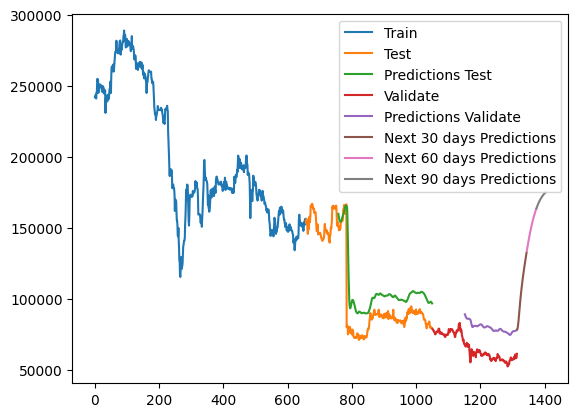

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+30, stop=len(df1)+60, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+60, stop=len(df1)+90, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()


<h1># 4. Split the data into training, testing, and validation arcording to 6:3:1

In [ ]:

train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 10s 315ms/step - loss: 0.1052 - val_loss: 0.0103
Epoch 2/100
11/11 [==============================] - 2s 200ms/step - loss: 0.0157 - val_loss: 0.0262
Epoch 3/100
11/11 [==============================] - 3s 309ms/step - loss: 0.0085 - val_loss: 0.0113
Epoch 4/100
11/11 [==============================] - 2s 195ms/step - loss: 0.0060 - val_loss: 0.0153
Epoch 5/100
11/11 [==============================] - 2s 191ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 6/100
11/11 [==============================] - 2s 193ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 7/100
11/11 [==============================] - 2s 193ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 8/100
11/11 [==============================] - 2s 197ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/100
11/11 [==============================] - 3s 314ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/100
11/11 [==============================] - 2s 197ms/step - loss: 0.0028 - val_l

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 98ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val, yval, ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error
# 12. Đánh giá độ chính xác thuật toán bằng RMSE , MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))


mae_test = mean_absolute_error(ytest, y_pred)
mae_val = mean_absolute_error(yval, y_pred_val)

mape_test = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mape_val = np.mean(np.abs((yval - y_pred_val) / yval)) * 100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print("Validate MAE: ", mae_val)
print("Test MAE: ", mae_test)
print("Validate MAPE: ", mape_val)
print("Test MAPE: ", mape_test)

Validation RMSE: 19038.059634020025
Testing RMSE: 13377.765599936805
Validate MAE:  18981.8046875
Test MAE:  13118.633985708191
Validate MAPE:  33.42199363548539
Test MAPE:  16.680256719889737


In [ ]:
# 13. Dự báo 90 ngày tiếp theo
x_input=val_data[32:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.10957467]
101
1 day input [0.0397463  0.04059197 0.0384778  0.03509514 0.03763214 0.03636364
 0.03340381 0.03340381 0.03340381 0.03382664 0.03763214 0.03551797
 0.03298097 0.03298097 0.02663848 0.02029598 0.02283298 0.01987315
 0.01606765 0.02114165 0.01902748 0.01902748 0.02029598 0.02241015
 0.02494715 0.02325581 0.02283298 0.02579281 0.02367865 0.02325581
 0.01902748 0.01733615 0.01606765 0.02198732 0.02536998 0.02579281
 0.02452431 0.02706131 0.0372093  0.03424947 0.03171247 0.02875264
 0.02790698 0.03002114 0.02621564 0.02325581 0.01775899 0.01860465
 0.01860465 0.01987315 0.02029598 0.01902748 0.01860465 0.02114165
 0.01987315 0.01775899 0.01818182 0.01649049 0.01479915 0.01691332
 0.01522199 0.01183932 0.01057082 0.01183932 0.01226216 0.01479915
 0.01057082 0.00972516 0.00634249 0.         0.00295983 0.00211416
 0.00465116 0.00803383 0.00803383 0.01733615 0.01775899 0.01902748
 0.02198732 0.02706131 0.02156448 0.02156448 0.01860465 0.01945032
 0.02156448 0.02114165 0.02367865

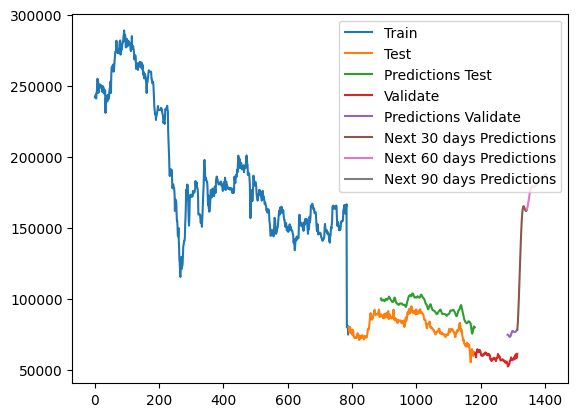

In [ ]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

next_30_days_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train','Test','Predictions Test','Validate','Predictions Validate','Next 30 days Predictions','Next 60 days Predictions','Next 90 days Predictions'])

plt.show()